# Линейная регрессия

В данной работе вам предстоит поработать с линейной регрессией и L1/L2 регуляризациями на практике.

In [279]:
# Импорт необходимых библиотек
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. Имплементация функций потерь и производных
В первую очередь реализуйте функции ниже.

Для этого вам могут понадобиться следующие соотношения для минимизируемых функционалов, регуляризаций и их градиентов:

### MSE линейная регрессия:
$$ Q_{MSE}(\mathbf{w}) = \sum_i (y_i - \mathbf{x}^\mathsf{T}_i \mathbf{w})^2 = \|Y - X\mathbf{w}\|^2_2 \rightarrow \min_{\mathbf{w}},$$
$$ \nabla_\mathbf{w} Q_{MSE}(\mathbf{w}) = 2X^\mathsf{T}(X\mathbf{w} - Y).$$

### MAE линейная регрессия:
$$Q_{MAE}(\mathbf{w}) = \sum_i |y_i - \mathbf{x}^\mathsf{T}_i \mathbf{w}| = \|Y - X\mathbf{w}\|_1 \rightarrow \min_{\mathbf{w}},$$
$$ \nabla_\mathbf{w} Q_{MAE}(\mathbf{w}) = X^\mathsf{T}\text{sign}(X\mathbf{w} - Y),$$
где
$$ \text{sign}(x) = 
\begin{cases} 
1, \; x \geq 0, \\
-1, \; x < 0.
\end{cases}
$$ - функция знака, применяющаяся к векторам и матрицам поэлементно.

### L2 регуляризация:
$$ Q(\mathbf{w}) = \text{Empirical risk} + \lambda \cdot \|\mathbf{w}\|^2_2.$$

### L1 регуляризация:
$$ Q(\mathbf{w}) = \text{Empirical risk} + \lambda \cdot \|\mathbf{w}\|_1.$$

Градиенты L2 ($\|\mathbf{w}\|^2_2$) и L1 ($\|\mathbf{w}\|_1$) регуляризаций попробуйте вывести сами, используя определение градиента:
$$ \nabla_{\mathbf{w}}f(x) = \begin{bmatrix}
\frac{\partial f(\mathbf{w})}{\partial \omega_1} \\
\frac{\partial f(\mathbf{w})}{\partial \omega_2} \\
\dots \\
\frac{\partial f(\mathbf{w})}{\partial \omega_d}
\end{bmatrix}
.
$$

В случае если это вызывает значительные трудности, попытайтесь найти ответ в Интернете или пишите мне в личку (Telegram: [@vovaf709](https://t.me/vovaf709)).

При реализации функций вам могут понадобиться:
1. Документация [numpy](https://numpy.org/doc/stable/user/index.html)
2. [np.sign](https://numpy.org/doc/stable/reference/generated/numpy.sign.html)
3. [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.sign.html)

Для удобства дальнейшего использования в реализациях функций потерь и градиентов **нормализуйте их значения на объём выборки** (т.е. усредняйте - делите истинные значения на кол-во обучающих объектов)!

In [280]:
import numpy as np


def mse(X, Y, w):
    """
    Вычисляет MSE ошибку линейной регрессии

    Вход:
        X : матрица объектов-признаков, numpy массив размера (#кол-во объектов, #кол-во признаков)
        Y : вектор истинных значений таргета, numpy массив размера (#кол-во признаков,)
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: float
        Одно число, явяющееся MSE ошибкой модели линейной регрессии
    """

    return np.mean((X @ w - Y) ** 2)


def mae(X, Y, w):
    """
    Вычисляет MAE ошибку линейной регрессии

    Вход:
        X : матрица объектов-признаков, numpy массив размера (#кол-во объектов, #кол-во признаков)
        Y : вектор истинных значений таргета, numpy массив размера (#кол-во признаков,)
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: float
        Одно число, явяющееся MAE ошибкой модели линейной регрессии
    """

    return np.mean(np.abs(X @ w - Y)) 


def l2_reg(w):
    """
    Вычисляет слагаемое L2 регуляризациии

    Вход:
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: float
        Одно число, явяющееся суммой квадратов элементов вектора весов
    """

    return np.sum(w**2)


def l1_reg(w):
    """
    Вычисляет слагаемое L1 регуляризациии

    Вход:
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: float
        Одно число, явяющееся суммой модулей элементов вектора весов
    """

    return np.sum(np.abs(w))


def no_reg(w):
    """
    Игнорирует регуляризацию
    """

    return 0


def mse_derivative(X, Y, w):
    """
    Вычисляет градиент MSE ошибки линейной регрессии по вектору весов

    Вход:
        X : матрица объектов-признаков, numpy массив размера (#кол-во объектов, #кол-во признаков)
        Y : вектор истинных значений таргета, numpy массив размера (#кол-во признаков,)
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: numpy array
        dw: numpy массив, такого же размера как w
    """

    return 2 * X.T @ (X @ w - Y) / Y.shape


def mae_derivative(X, Y, w):
    """
    Вычисляет градиент MAE ошибки линейной регрессии по вектору весов

    Вход:
        X : матрица объектов-признаков, numpy массив размера (#кол-во объектов, #кол-во признаков)
        Y : вектор истинных значений таргета, numpy массив размера (#кол-во признаков,)
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: numpy array
        dw: numpy массив, такого же размера как w
    """

    return X.T @ np.sign(X @ w - Y) / Y.shape
    

def l2_reg_derivative(w):
    """
    Вычисляет градиент слагаемого L2 регуляризациии по вектору весов

    Вход:
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: numpy array
        dw: numpy массив, такого же размера как w
    """

    return 2 * w


def l1_reg_derivative(w):
    """
    Вычисляет градиент слагаемого L1 регуляризациии по вектору весов

    Вход:
        w : вектор весов линейной регрессии, numpy массив размера (#кол-во признаков,)

    Выход: numpy array
        dw: numpy массив, такого же размера как w
    """

    return w / w


def no_reg_derivative(w):
    """
    Игнорирует регуляризацию
    """

    return np.zeros_like(w)

Тестировать имплементации мы будем на части данных датасета [Boston house prices](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices), которые были предварительно предобработаны для вашего удобства

In [281]:
# Скачивание данных
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=137v-LY9izoh_PEvffqOKY_2lLn6l4fAD' -O boston.json

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"id" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [282]:
# Загрузка данных
import json
with open('boston_subset.json', 'r') as f:
    dataset = json.load(f)
feature_matrix = np.array(dataset['data'])
targets = np.array(dataset['target'])

### Протестируем имплементации

In [283]:
# Выберем некоторый вектор весов w
w = np.array([1.27, 1.27])
x_n, y_n = feature_matrix, targets

In [284]:
l1_reg_derivative(w)

array([1., 1.])

In [285]:
reference_mse_derivative = np.array([29.31560271, 38.22697594])
reference_l2_reg_derivative = np.array([2.54, 2.54])

assert np.allclose(
    reference_mse_derivative,
    mse_derivative(x_n, y_n, w), rtol=1e-3
), 'Что-то не так с градиентом MSE'

assert np.allclose(
    reference_l2_reg_derivative,
    l2_reg_derivative(w), rtol=1e-3
), 'Что-то не так с градиентом L2 регуляризации'

print(
    'Градиент MSE:\n{} \n\nГрадиент L2 регуляризации:\n{}'.format(
        mse_derivative(x_n, y_n, w),
        l2_reg_derivative(w))
)

Градиент MSE:
[29.31560271 38.22697594] 

Градиент L2 регуляризации:
[2.54 2.54]


In [286]:
reference_mae_derivative = np.array([0.78835468, 1.02296552])
reference_l1_reg_derivative = np.array([1, 1])

assert np.allclose(
    reference_mae_derivative,
    mae_derivative(x_n, y_n, w), rtol=1e-3
), 'Что-то не так с градиентом MAE'

assert np.allclose(
    reference_l1_reg_derivative,
    l1_reg_derivative(w), rtol=1e-3
), 'Что-то не так с градиентом L1 регуляризации'

print(
    'Градиент MAE:\n{} \n\nГрадиент L1 регуляризации:\n{}'.format(
        mae_derivative(x_n, y_n, w),
        l1_reg_derivative(w))
)

Градиент MAE:
[0.78835468 1.02296552] 

Градиент L1 регуляризации:
[1. 1.]


Определим функцию, обучающую линейную регрессию:

In [287]:
def get_w_by_grad(X, Y, w_0, loss_mode='mse', reg_mode=None, lr=0.05, n_steps=100, reg_coeff=0.05, verbose=True):
    """
    Находит оптимальное решение задачи линейной регрессии методом градиентного спуска

    Вход:
        X : матрица объектов-признаков, numpy массив размера (#кол-во объектов, #кол-во признаков)
        Y : вектор истинных значений таргета, numpy массив размера (#кол-во признаков,)
        w_0 : начальное приближение вектора весов линейной регрессии, numpy массив размера (#кол-во признаков,)
        loss_mode: строка, определяющая функцию потерь: `mse` или `mae`
        reg_mode: строка или None, определяющая регуляризацию: `l2`, `l1` или `None`
        lr: размер шага градиентного спуска
        n_steps: количество итераций градиентного спуска
        reg_coeff: коэффициент регуляризации
        verbose: флаг, контролирующий вывод прогресса обучения

    Выход:
        w: найденный вектор весов линейной регрессии размера (#кол-во признаков,)
    """

    if loss_mode == 'mse':
        loss_function = mse
        loss_derivative = mse_derivative
    elif loss_mode == 'mae':
        loss_function = mae
        loss_derivative = mae_derivative
    else:
        raise ValueError(f'Неизвестная функция потерь `{loss_mose}`. Доступные функции: `mse`, `mae`')
    
    if reg_mode is None:
        reg_function = no_reg
        reg_derivative = no_reg_derivative
    elif reg_mode == 'l2':
        reg_function = l2_reg
        reg_derivative = l2_reg_derivative
    elif reg_mode == 'l1':
        reg_function = l1_reg
        reg_derivative = l1_reg_derivative
    else:
        raise ValueError(f'Неизвестная функция потерь `{reg_mode}`. Доступные регуляризации: `l2`, `l1`, `None`')
    

    w = w_0.copy()

    for i in range(n_steps):
        empirical_risk = loss_function(X, Y, w)
        loss = empirical_risk + reg_coeff * reg_function(w)
        gradient = loss_derivative(X, Y, w) + reg_coeff * reg_derivative(w)
        gradient_norm = np.linalg.norm(gradient)
        # Если градиент слишком большой по норме, то перенормируем его до нормы, равной 5,
        # чтобы стабилизировать процесс оптимизации.
        if gradient_norm > 5:
            gradient = gradient / gradient_norm * 5.
        w -= lr * gradient
        
        if verbose and i % 25 == 0:
            print('Шаг={}: Функция потерь={}, Функция потерь без регуляризации={},\nЗначения градиента={}\n'.format(i, loss, empirical_risk, gradient))
    return w

Посмотрим как это работает

In [288]:
# Начальное приближение 
w_0 = np.ones(2)
y_n = targets

In [289]:
w_grad = get_w_by_grad(x_n, y_n, w_0, loss_mode='mse', reg_mode='l2', n_steps=250)

Шаг=0: Функция потерь=231.28353984777308, Функция потерь без регуляризации=231.1835398477731,
Значения градиента=[3.03360308 3.97457575]

Шаг=25: Функция потерь=58.512903511682715, Функция потерь без регуляризации=57.33238301124367,
Значения градиента=[2.28551977 4.44706638]

Шаг=50: Функция потерь=48.29584498872882, Функция потерь без регуляризации=45.93226939472598,
Значения градиента=[-0.89558132  0.76425616]

Шаг=75: Функция потерь=47.292783042717005, Функция потерь без регуляризации=44.57284255072482,
Значения градиента=[-0.48111511  0.40907079]

Шаг=100: Функция потерь=47.00419092029711, Функция потерь без регуляризации=44.042540359168825,
Значения градиента=[-0.25806412  0.21942022]

Шаг=125: Функция потерь=46.921159712801064, Функция потерь без регуляризации=43.815277212667276,
Значения градиента=[-0.1384223   0.11769421]

Шаг=150: Функция потерь=46.897270698227686, Функция потерь без регуляризации=43.709828689299854,
Значения градиента=[-0.07424796  0.06312967]

Шаг=175: Функц

## Вопрос 1
Если всё было реализовано верно, вы увидите, что значения градиента становятся меньше с каждым шагом. Почему?

$\color{blue}{\textit{Ваш ответ:}}$ Наша основаная задача - найти ту самую минимальную ошибку. Для этого методом градиентного спуска мы постепенно приближаемся к искомому минимуму уменьшая при этом шаг градиента. Отсюда и значения градиента становтяся меньше с каждой иетрацией.

### Cравнение с `sklearn`
Будем проводить сравнение в постановке задачи линейной регрессии с MSE и L2-регуляризацией. В `sklearn` этот алгоритм реализован в виде класса [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [290]:
# Импортируем класс линейной регрессии с L2 регуляризацией
from sklearn.linear_model import Ridge

In [291]:
# Создаём объект класса
sklearn_model = Ridge(alpha=0.05)

# Вызываем метод `fit`, отвечающий за обучение линейной регрессии
sklearn_model.fit(x_n, y_n)
print('Линейная регрессия из `sklearn` даёт решение с MSE ошибкой = {}'.format(np.mean((sklearn_model.predict(x_n) - y_n)**2)))

Линейная регрессия из `sklearn` даёт решение с MSE ошибкой = 42.53541245128315


По какой-то причине реализация линейной регрессии из `sklearn` имеет меньшее значение ошибки, чем ваша. Построим графики предсказанных плоскостей:

In [292]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

xs = np.linspace(0, 4, 10)
ys = np.linspace(0, 4, 10)
df = pd.DataFrame(
    np.concatenate((x_n[:, 0, None], x_n[:, 1, None], y_n[:, None]), axis=1),
    columns=['x1', 'x2', 'y'],
)

xn, yn = np.meshgrid(xs, ys)
zn_ours = xn * w_grad[0] + yn * w_grad[1]
sklearn_input = np.concatenate([xn.flatten()[:,None], yn.flatten()[:,None]], axis=-1)
zn_sklearn = sklearn_model.predict(sklearn_input).reshape((10, 10))
fig = px.scatter_3d(
    df, x='x1', y='x2', z='y', opacity=0.9, width=1000, height=1000, range_x=(0, 2.5), range_y=(0, 4),
    title='Визуальное сравнение',
)
fig.add_trace(
    go.Surface(
        x=xs, y=ys, z=zn_ours, showscale=False, opacity=1, name='Самописная линейная регрессия',
        colorscale = [[0, 'rgb(255,0,0)'], [1, 'rgb(255,0,0)']], showlegend=True))
fig.add_trace(
    go.Surface(
        x=xs, y=ys, z=zn_sklearn, showscale=False, opacity=1, name='Линейная регрессия из sklearn',
        colorscale = [[0, 'rgb(0,255,0)'], [1, 'rgb(0,255,0)']], showlegend=True))
fig.show()

Построенные плоскости довольно ясно различимы!

## Вопрос 2
Почему ваша реализация была изначально обречена на несовпадение с реализацией из `sklearn`?

Подсказка: на правильный ответ вас может натолкнуть формула линейной регрессии в нематричном виде и то, какие предсказания обе модели делают на векторе [0, 0]. Чтобы посчитать его для модели из `sklearn`, вам понадобится метод [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.predict) класса `Ridge`.

$\color{blue}{\textit{Ваш ответ:}}$ Предположу, что из-за несовпадения регуляризационного коэффициента, который в sklearn по умолчанию 1, а у нас судя по всему 0.05.

### Влияние выбросов
На лекции мы обсуждали, что функция потерь MSE сильно чувствительнее к выбросам, чем MAE. Попробуем пронаблюдать это на примере.
Сначала посмотрим на распределение таргетов по всем обучающим объектам, чтобы понять какое значение можно считать выбросом:

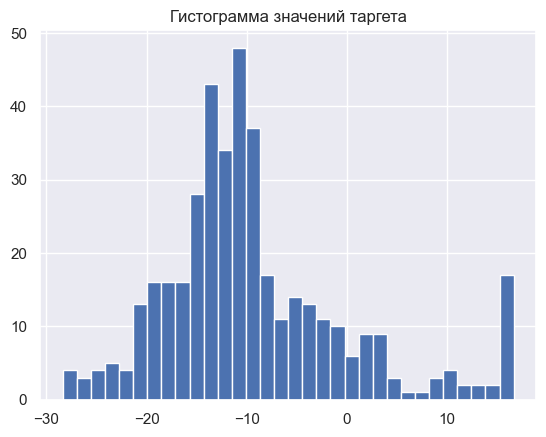

In [293]:
plt.title('Гистограмма значений таргета')
plt.hist(y_n, bins=32)
plt.show()

Видно, что таргет принимает значения в интервале от -30 до 20. Посмотрим также на то, какие фичи характерны для нашего датасета:

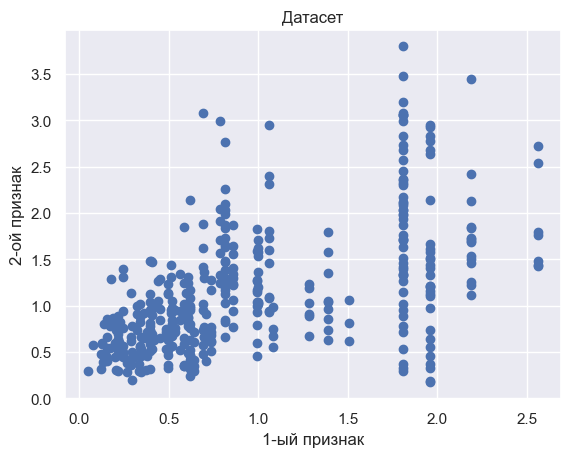

In [294]:
plt.title('Датасет')
plt.plot(x_n[:, 0], x_n[:, 1], 'o')
plt.xlabel('1-ый признак')
plt.ylabel('2-ой признак')
plt.show()

Можно сказать, что оба признака принимают значения в интервале от 0 до 4. Тогда согласно графикам можно сказать, что объект с признаками от 0 до 4 и таргетом **сильно** не попадающим в интервал от -30 до 20 будет выбросом. Сгенерируйте объект-выброс с аномально большим значением таргета и добавьте его в обучающую выборку. Вам может понадобиться функция [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).

In [295]:
# Определите какие признаки и таргет будет иметь объект-выброс
x_outlier = np.array([[4,4]])
y_outlier = np.array([2000])

# Добавьте к исходной матрице признаков объектов `x_n` строчку с признаками объекта-выброса
x_n_outlier = np.concatenate((x_n, x_outlier), axis=0)
# Добавьте к столбцу таргетов `y_n` элемент со значением таргета объекта-выброса
y_n_outlier = np.concatenate((y_n, y_outlier), axis=0)

# Не забудьте, что между строчками матрицы объектов-признаков и элементами столбца таргетов есть соответствие!

Обучите модели с MSE и MAE на выборках без выброса и с выбросом. Воспользуйтесь для этого функцией обучения `get_w_by_grad`. Для простоты не используйте регуляризацию. Чтобы не засорять вывод ноутбука, вам может быть полезен аргумент `verbose=False` функции `get_w_by_grad`

In [296]:
# Начальное приближение 
w_0 = np.ones(2)

# Результат обучения с MAE на исходной выборке
w_grad_l1_ok =  get_w_by_grad(x_n, y_n, w_0, loss_mode='mae', reg_mode='l1', n_steps=250)
# Результат обучения с MAE на выборке с выбросом
w_grad_l1_out = get_w_by_grad(x_n_outlier, y_n_outlier, w_0, loss_mode='mae', reg_mode='l1', n_steps=250)

# Результат обучения с MSE на исходной выборке
w_grad_l2_ok = get_w_by_grad(x_n, y_n, w_0, loss_mode='mse', reg_mode='l1', n_steps=250)
# Результат обучения с MSE на выборке с выбросом
w_grad_l2_out = get_w_by_grad(x_n_outlier, y_n_outlier, w_0, loss_mode='mse', reg_mode='l1', n_steps=250)

Шаг=0: Функция потерь=13.643791083575469, Функция потерь без регуляризации=13.543791083575469,
Значения градиента=[0.83487192 1.0709803 ]

Шаг=25: Функция потерь=11.389637494866147, Функция потерь без регуляризации=11.370841189447427,
Значения градиента=[0.82543842 1.05358128]

Шаг=50: Функция потерь=9.436447447543863, Функция потерь без регуляризации=9.301594381041399,
Значения градиента=[0.80764532 1.02129557]

Шаг=75: Функция потерь=7.637517689695467, Функция потерь без регуляризации=7.390961495114186,
Значения градиента=[0.7701133  0.96539901]

Шаг=100: Функция потерь=6.243575219719171, Функция потерь без регуляризации=5.898262153216708,
Значения градиента=[0.53876355 0.76631034]

Шаг=125: Функция потерь=5.6515716002165695, Функция потерь без регуляризации=5.240656132236274,
Значения градиента=[0.31286207 0.50617734]

Шаг=150: Функция потерь=5.462112825803954, Функция потерь без регуляризации=5.0129657322078955,
Значения градиента=[0.1317734  0.34912315]

Шаг=175: Функция потерь=5.

Построим предсказания моделей, обученных на исходных и на зашумленных выборках:

In [297]:
zn_l2_ok = xn * w_grad_l2_ok[0] + yn * w_grad_l2_ok[1]
zn_l2_out = xn * w_grad_l2_out[0] + yn * w_grad_l2_out[1]
fig = px.scatter_3d(
    df, x='x1', y='x2', z='y', opacity=0.9, width=1000, height=1000, range_x=(0, 2.5), range_y=(0, 4),
    title='MSE',
)
fig.add_trace(
    go.Surface(
        x=xs, y=ys, z=zn_l2_ok, showscale=False, opacity=1, name='Линейная регрессия с MSE на исходной выборке',
        colorscale = [[0, 'rgb(255,0,0)'], [1, 'rgb(255,0,0)']], showlegend=True))
fig.add_trace(
    go.Surface(
        x=xs, y=ys, z=zn_l2_out, showscale=False, opacity=1, name='Линейная регрессия с MSE на выборке с выбросом',
        colorscale = [[0, 'rgb(0,255,0)'], [1, 'rgb(0,255,0)']], showlegend=True))
fig.show()

In [298]:
zn_l1_ok = xn * w_grad_l1_ok[0] + yn * w_grad_l1_ok[1]
zn_l1_out = xn * w_grad_l1_out[0] + yn * w_grad_l1_out[1]
fig = px.scatter_3d(
    df, x='x1', y='x2', z='y', opacity=0.9, width=1000, height=1000, range_x=(0, 2.5), range_y=(0, 4),
    title='MAE',
)
fig.add_trace(
    go.Surface(
        x=xs, y=ys, z=zn_l1_ok, showscale=False, opacity=1, name='Линейная регрессия с MAE на исходной выборке',
        colorscale = [[0, 'rgb(255,0,0)'], [1, 'rgb(255,0,0)']], showlegend=True))
fig.add_trace(
    go.Surface(
        x=xs, y=ys, z=zn_l1_out, showscale=False, opacity=1, name='Линейная регрессия с MAE на выборке с выбросом',
        colorscale = [[0, 'rgb(0,255,0)'], [1, 'rgb(0,255,0)']], showlegend=True))
fig.show()

## Вопрос 3
Какие различия между MSE и MAE вы видите на графиках? Какие выводы из этого можно сделать?
Подсказка: если различия незаметны, попробуйте увеличить значение таргета у объекта-выброса и построить графики заново.

$\color{blue}{\textit{Ваш ответ:}}$ В MSE итоговая поверхность сильно изменилась, в MAE почти не поменялась. Это произошло из-за того, что MSE работае с квадратами ошибок, а MAE с обычными значениями, поэтому на MAE выбросы влияют меньше.

## Вопрос 4
Может ли помочь L2/L1 регуляризация для борьбы с выбросами?

$\color{blue}{\textit{Ваш ответ:}}$ Нет, регуляризация вводится для других задач, а именно в основном для предотвращения переобучения модели.